In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.3 MB/s eta 0:00:00


In [ ]:
import torch

class Model(torch.nn.Module):

  def __init__(self, model_type):
    super(Model, self).__init__()

    self.mean = torch.tensor([0.485, 0.456, 0.406])
    self.std = torch.tensor([0.229, 0.224, 0.225])
    self.midas = torch.hub.load('intel-isl/MiDaS', model_type)

  def forward(self, x):
    x = x / 255.0
    x = (x - 0.45) / 0.225
    x = self.midas(x)
    x = x - torch.min(x)
    x = x / torch.max(x)
    return x


#model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = Model(model_type)

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Loading weights:  None


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

Model(
  (midas): MidasNet_small(
    (pretrained): Module(
      (layer1): Sequential(
        (0): Conv2dSameExport(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
        (3): Sequential(
          (0): DepthwiseSeparableConv(
            (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (act1): ReLU6(inplace=True)
            (se): Identity()
            (conv_pw): Conv2d(32, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn2): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (act2): Identity()
          )
        )
        (4): Sequential(
          (0): InvertedResidual(
            (conv_pw): Conv2d(24, 144, kernel_size=(1, 1), stri

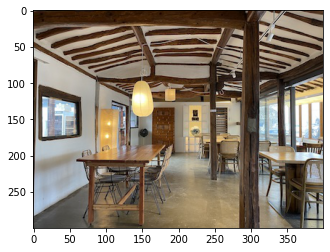

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import urllib.request

url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
urllib.request.urlretrieve(url, filename)

img = Image.open('IMG_3166.jpg')
np_img = np.array(img)
plt.imshow(np_img)

In [ ]:
import torchvision
from PIL import Image

transform = torchvision.transforms.Compose([
    torchvision.transforms.PILToTensor(),
    torchvision.transforms.Resize(size=(256,256), interpolation=torchvision.transforms.InterpolationMode.BICUBIC),
    #torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

input_batch = transform(img)
input_batch = input_batch.unsqueeze(0)

print(torch.unique(input_batch))

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

np.unique(output)=array([-0.00785428, -0.00741975, -0.0065323 , ...,  0.99967235,
        0.99978656,  1.0001969 ], dtype=float32)


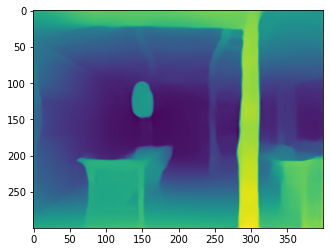

In [ ]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=(img.size[1], img.size[0]),
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()
print(f'{np.unique(output)=}')
plt.imshow(output)